In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [11]:
df_skills_spain = df[df['job_country'] == 'Spain'].copy()
df_skills_spain = df_skills_spain.explode('job_skills')
skills_count = df_skills_spain.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count = df_skills_count.dropna().reset_index()
df_skills_count

,index,job_skills,job_title_short,skill_count
0,987,python,Data Engineer,3827
1,988,python,Data Scientist,3804
2,1249,sql,Data Engineer,3765
3,1248,sql,Data Analyst,2595
4,1250,sql,Data Scientist,2493
...,...,...,...,...
1530,766,neo4j,Machine Learning Engineer,1
1531,1288,ssrs,Senior Data Analyst,1
1532,1287,ssrs,Machine Learning Engineer,1
1533,762,neo4j,Business Analyst,1


In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

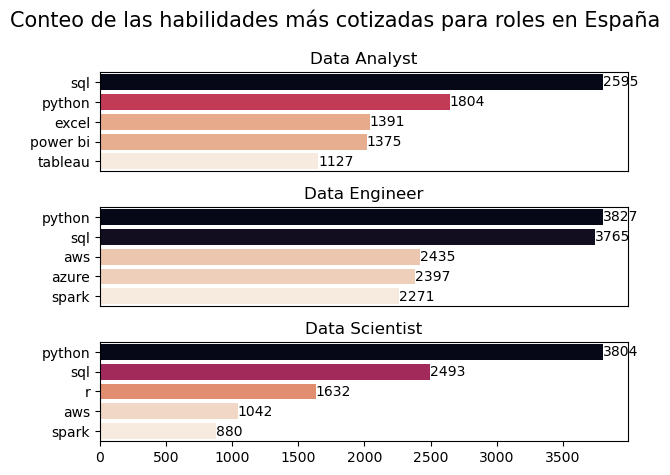

In [13]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate (job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='rocket_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    for n, v in enumerate (df_plot['skill_count']):
        ax[i].text(v, n, v, va='center')
    if i != len(job_titles) - 1: 
        ax[i].set_xticks([])
fig.suptitle('Conteo de las habilidades más cotizadas para roles en España', fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
df_job_title_count = df_skills_spain['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count = df_job_title_count.dropna()
df_skill_percentage = pd.merge(df_skills_count,df_job_title_count, how='left', on='job_title_short')
df_skill_percentage['skill_percent'] = 100* (df_skill_percentage['skill_count']/df_skill_percentage['jobs_total'])
df_skill_percentage

,index,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,987,python,Data Engineer,3827,39949,9.579714
1,988,python,Data Scientist,3804,26060,14.597084
2,1249,sql,Data Engineer,3765,39949,9.424516
3,1248,sql,Data Analyst,2595,18701,13.876263
4,1250,sql,Data Scientist,2493,26060,9.566385
...,...,...,...,...,...,...
1530,766,neo4j,Machine Learning Engineer,1,3525,0.028369
1531,1288,ssrs,Senior Data Analyst,1,2618,0.038197
1532,1287,ssrs,Machine Learning Engineer,1,3525,0.028369
1533,762,neo4j,Business Analyst,1,4305,0.023229


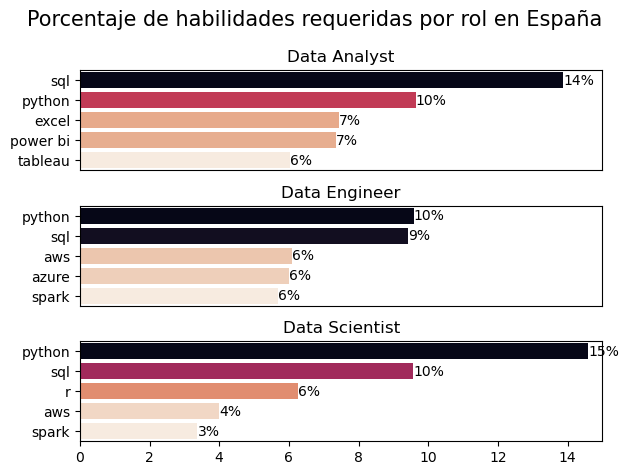

In [19]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate (job_titles):
    df_plot = df_skill_percentage[df_skill_percentage['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='rocket_r')
    ax[i].set_ylabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,15)
    for n, v in enumerate (df_plot['skill_percent']):
        ax[i].text(v, n, f'{v:.0f}%', va='center')
    if i != len(job_titles) - 1: 
        ax[i].set_xticks([])
fig.suptitle('Porcentaje de habilidades requeridas por rol en España', fontsize=15)
plt.tight_layout()
plt.show()